In [1]:
import pandas as pd # standard
import numpy as np # standard

import matplotlib.pyplot as plt
import seaborn as sns


from tabulate import tabulate

import thermogram_utilities

import warnings
warnings.filterwarnings("ignore")

In [2]:
prev = pd.read_excel("/Users/avery/OneDrive/Documents/GitHub/Clinical_TLB_2023-2024/lung_cancer_tlb.xlsx")
substages = pd.read_excel("patient_substage.xlsx")
stage_df = pd.merge(prev, substages, left_on = "pub_id", right_on = "pub_id")

In [3]:
lower_column_index = stage_df.columns.get_loc("T51")
upper_column_index = stage_df.columns.get_loc("T83.1")
label_column_index = stage_df.columns.get_loc("Diagnosis")
cancer_column_index = stage_df.columns.get_loc("Current Clinical Stage")

column_indices = np.arange(lower_column_index, upper_column_index)
column_indices = np.append(column_indices, label_column_index)
column_indices = np.append(column_indices, cancer_column_index)


stage_df = stage_df.iloc[:, column_indices]

# keep only Control and Adenocarcinoma for analysis
stage_df = stage_df.reset_index(drop=True)



In [4]:
display_df = stage_df[(stage_df["Diagnosis"] != "Control") & (stage_df["Diagnosis"] != "SCLC")]

display_df.groupby("Diagnosis")["Current Clinical Stage"].value_counts()

Diagnosis  Current Clinical Stage
AC         4                         29
           1                         16
           3                         15
           2                         10
Large      1                          2
           2                          2
           4                          2
Mix        3                          1
           4                          1
NOS        4                          6
           1                          1
           3                          1
SCC        3                         16
           4                         15
           2                          8
           1                          7
Name: count, dtype: int64

In [5]:
stage_df["cancer stage"] = stage_df["Diagnosis"] +"_" + stage_df["Current Clinical Stage"]
stage_df_long = pd.melt(stage_df, id_vars=['Current Clinical Stage', 'Diagnosis', 'cancer stage'], var_name = "temp", value_name="dsp")
stage_df_long["temp"] = stage_df_long["temp"].str.replace("T", "")
stage_df_long["temp"] = stage_df_long["temp"].astype(float)


In [6]:
cancer = "AC"

graph_df = stage_df_long[stage_df_long["Diagnosis"] == cancer]
median_df = thermogram_utilities.median_curve(graph_df, "cancer stage", "temp", "dsp")


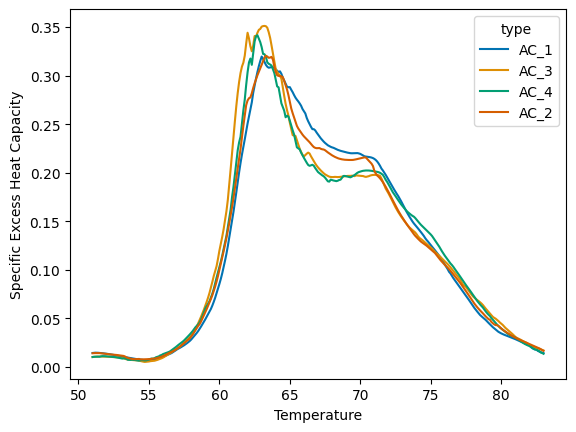

In [7]:
g = sns.lineplot(median_df, x = "temperature", y = "median", hue = "type", palette = 'colorblind')
plt.xlabel("Temperature")
plt.ylabel("Specific Excess Heat Capacity")
plt.show()
plt.show()

In [8]:
AC_results = pd.read_excel("AC_Stage.xlsx")

AC_results['max_depth'] = np.where(pd.isna(AC_results['max_depth']), "None", AC_results["max_depth"])
AC_results['max_features'] = np.where(pd.isna(AC_results['max_features']), "None", AC_results["max_features"])
adeno_results = AC_results.groupby(['n_estimators', 'max_depth', 'max_features'], as_index = False).mean().sort_values("Weighted Accuracy", ascending=False)


In [9]:
cancer = "SCC"

graph_df = stage_df_long[stage_df_long["Diagnosis"] == cancer]
median_df = thermogram_utilities.median_curve(graph_df, "cancer stage", "temp", "dsp")


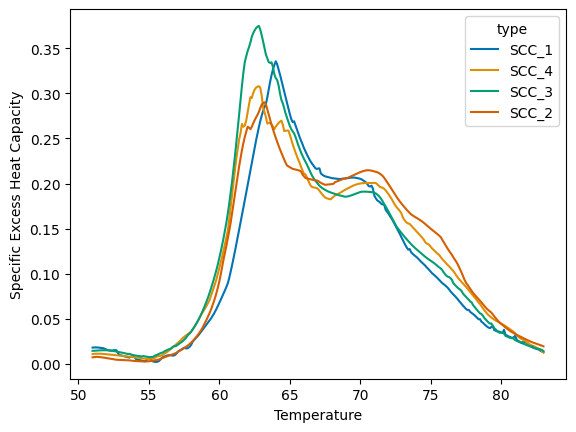

In [10]:
g = sns.lineplot(median_df, x = "temperature", y = "median", hue = "type", palette = 'colorblind')
plt.xlabel("Temperature")
plt.ylabel("Specific Excess Heat Capacity")
plt.show()

In [11]:
SCC_results = pd.read_excel("SCC_Stage.xlsx")

SCC_results['max_depth'] = np.where(pd.isna(SCC_results['max_depth']), "None", SCC_results["max_depth"])
SCC_results['max_features'] = np.where(pd.isna(SCC_results['max_features']), "None", SCC_results["max_features"])
scc_results = SCC_results.groupby(['n_estimators', 'max_depth', 'max_features'], as_index = False).mean().sort_values("Weighted Accuracy", ascending=False)


In [12]:
cancer = "Control"

graph_df = stage_df_long[(stage_df_long["Diagnosis"] != cancer) & (stage_df_long["Diagnosis"] != "SCLC") ]
median_df = thermogram_utilities.median_curve(graph_df, "Current Clinical Stage", "temp", "dsp")


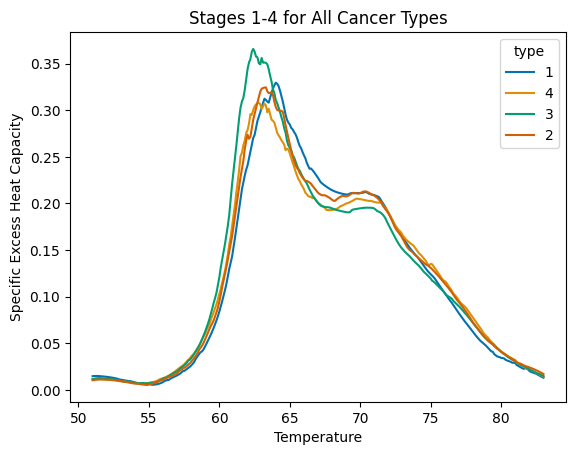

In [13]:
g = sns.lineplot(median_df, x = "temperature", y = "median", hue = "type", palette = 'colorblind')
plt.title("Stages 1-4 for All Cancer Types")
plt.xlabel("Temperature")
plt.ylabel("Specific Excess Heat Capacity")
plt.show()

In [14]:
all_results = pd.read_excel("All_Stage.xlsx")

all_results['max_depth'] = np.where(pd.isna(all_results['max_depth']), "None", all_results["max_depth"])
all_results['max_features'] = np.where(pd.isna(all_results['max_features']), "None", all_results["max_features"])
all_results = all_results.groupby(['n_estimators', 'max_depth', 'max_features'], as_index = False).mean().sort_values("Weighted Accuracy", ascending=False)


In [15]:
results = pd.concat([adeno_results.head(1), scc_results.head(1),  all_results.head(1)], ignore_index=True)
#results = results.drop("Type", axis=1)
results.insert(0, "Type", ["AC", "SCC", "All"])
results = results.drop(["n_estimators", "max_depth", "max_features"], axis = 1)
print(tabulate(results, headers='keys', tablefmt='fancy_grid'))

╒════╤════════╤═════════════════════╤══════════╕
│    │ Type   │   Weighted Accuracy │      AUC │
╞════╪════════╪═════════════════════╪══════════╡
│  0 │ AC     │            0.367951 │ 0.624821 │
├────┼────────┼─────────────────────┼──────────┤
│  1 │ SCC    │            0.329758 │ 0.605949 │
├────┼────────┼─────────────────────┼──────────┤
│  2 │ All    │            0.339149 │ 0.622328 │
╘════╧════════╧═════════════════════╧══════════╛
